<a href="https://colab.research.google.com/github/TheBigDen/dap-2024/blob/main/les7/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №7. Классификация

Выполните следующие задания:

1.	Открыл в файл в Google Colab (используя собственный форк репозитория).
2.	Решил задачи.
3.	Сохранил результат в репозиторий github в директорию ./les02
4.	Создал pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "Лабораторная работа №7 12002208 Генералов Даниил Вячеславович"
5.	Сдал работу в системе "Пегас", в отчете указал ссылку на pull request


Используя набор данных titanic.csv постройте модель предсказывающую выжил или погиб пассажир.
1.	PassengerId – Идентификатор пассажира (уникальный номер для каждого пассажира).
2.	Survived – Выжил (0 – не выжил, 1 – выжил).
3.	Pclass – Класс пассажира (1 – первый класс, 2 – второй класс, 3 – третий класс).
4.	Name – Имя (полное имя пассажира).
5.	Sex – Пол (male – мужчина, female – женщина).
6.	Age – Возраст (числовое значение, может быть дробным).
7.	SibSp – Количество родственников на борту (братьев, сестер или супругов).
8.	Parch – Количество родителей или детей на борту.
9.	Ticket – Номер билета.
10.	Fare – Стоимость билета (в фунтах стерлингов).
11.	Cabin – Номер каюты (может быть пропущен, если данные отсутствуют).
12.	Embarked – Порт посадки (C – Cherbourg, Q – Queenstown, S – Southampton).

In [8]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

## Извлечение данных

1. Создайте DataFarame из файла titanic.csv, в качестве индекса используйте столбец "PassengerId".

In [19]:
def load_titanic():
    print("Загрузите файл titanic.csv:")
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    return pd.read_csv(file_name, index_col="PassengerId")

2. Выведете первые 7 строк набора.

In [20]:

df = load_titanic()
print("\nПервые 7 строк набора данных:")
print(df.head(7))

Загрузите файл titanic.csv:


Saving titanic.csv to titanic (2).csv

Первые 7 строк набора данных:
             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
6                                             Moran, Mr. James    male   

### Подготовка данных

3. Выведете информацию о типах данных в наборе. Имеются ли в наборе не числовые признаки? Имеются ли в наборе данные имеющие значение null?
    

In [21]:
print("\nИнформация о данных:")
print(df.info())
print("\nКоличество пропущенных значений:")
print(df.isnull().sum())


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None

Количество пропущенных значений:
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


4. Удалите не числовые признаки, которые по вашему мнению, не могут влиять на заначение выжил или погиб пассажир.

In [22]:
df = df.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'])

5. Вместо признака "Sex" (я надеюсь вы его не удалили 😂) Создайте два новых признака male и female которые содержат значения 0 или 1.

In [23]:
df['male'] = (df['Sex'] == 'male').astype(int)
df['female'] = (df['Sex'] == 'female').astype(int)
df = df.drop(columns=['Sex'])

6. Удалите строки, которые содержать хотя бы одно null значение.

In [24]:
df = df.dropna()

## Исследование данных

4. Нормализуйте значения признака "Fare".

In [25]:
df['Fare'] = (df['Fare'] - df['Fare'].mean()) / df['Fare'].std()

5. Найдите разницу между средними значениями признака "Fare" для погибших и выживших пассажиров.

In [26]:
mean_fare_survived = df[df['Survived'] == 1]['Fare'].mean()
mean_fare_not_survived = df[df['Survived'] == 0]['Fare'].mean()
print("\nРазница средних значений 'Fare':", mean_fare_survived - mean_fare_not_survived)


Разница средних значений 'Fare': 0.5456979019785582


6. Простройте на одной оси координат гистограмы значений признака "Fare" для погибших и выживших пассажиров.

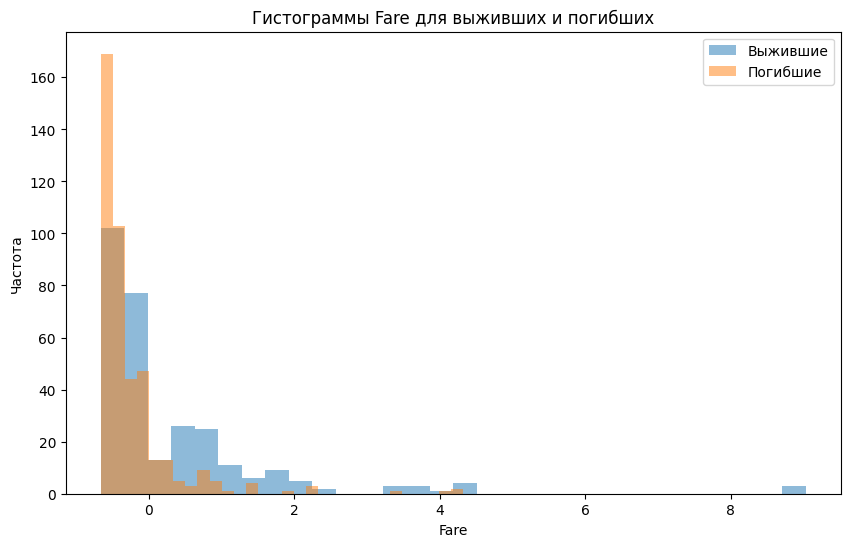

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['Survived'] == 1]['Fare'], bins=30, alpha=0.5, label='Выжившие')
plt.hist(df[df['Survived'] == 0]['Fare'], bins=30, alpha=0.5, label='Погибшие')
plt.xlabel('Fare')
plt.ylabel('Частота')
plt.title('Гистограммы Fare для выживших и погибших')
plt.legend()
plt.show()

7. Сформируйте набор признаков (X). Сформируйте вектор целевых значений (y).

In [28]:
X = df.drop(columns=['Survived'])
y = df['Survived']

## Предсказательная модель

8. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


9. Выполните обучение модели.

In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Проверка модели

10. Выведите мартицу ошибок

In [32]:
y_pred = model.predict(X_test)

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nМатрица ошибок:")
print(conf_matrix)


Матрица ошибок:
[[91 16]
 [25 47]]


11. Расчитайте accuracy

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print("\nТочность модели (accuracy):", accuracy)


Точность модели (accuracy): 0.770949720670391


12. Сделайте вывод о полученном результате

In [34]:
if accuracy > 0.75:
    print("\nМодель имеет хорошую точность.")
else:
    print("\nМодель требует доработки.")


Модель имеет хорошую точность.


Вывод: **Модель** имеет хорошую точность.

## Вопросы для защиты

### Ответы на вопросы

---

#### 1. Сформулируйте задачу классификации.
Задача классификации заключается в том, чтобы на основании входных данных \(X\) спрогнозировать категорию или класс \(y\). Это делается на основе обучающего набора данных, содержащего метки классов.

Пример: Определение, выжил ли пассажир (0 или 1), на основе его данных (возраст, пол, класс и т. д.) в наборе Titanic.

---

#### 2. Перечислите типы классификации.
1. **Бинарная классификация**:
   - Два класса (например, выжил/не выжил).

2. **Мультиклассовая классификация**:
   - Более двух классов (например, классификация видов ирисов: Setosa, Versicolor, Virginica).

3. **Мульти-меточная классификация (Multi-label)**:
   - Один объект может принадлежать сразу нескольким классам (например, классификация картинок, где изображение может быть и "кот", и "дом").

4. **Несбалансированная классификация**:
   - Одни классы значительно преобладают над другими (например, в медицинских данных, где больные составляют 5% от общего числа).

---

#### 3. В чем особенность несбалансированной классификации?
- Основная проблема: алгоритмы могут быть склонны предсказывать преобладающий класс, игнорируя меньшинство.
- Метрика **Accuracy** становится менее полезной, и используются альтернативы:
  - **Precision** и **Recall**.
  - **F1-Score**.
  - **ROC-AUC**.

---

#### 4. В чем особенность мультиклассовой классификации?
- Проблема с более чем двумя классами.
- Требуются специальные подходы, такие как:
  - Стратегия "Один против всех" (One-vs-All).
  - Стратегия "Один против одного" (One-vs-One).
- Пример: классификация видов животных (кот, собака, лошадь).

---

#### 5. В чем особенность бинарной классификации?
- Всего два класса (например, 0 и 1).
- Простая структура матрицы ошибок:
  - True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN).
- Метрики: **Accuracy**, **Precision**, **Recall**, **F1-Score**.

---

#### 6. В чем особенность классификации по нескольким меткам?
- Один объект может быть одновременно отнесен к нескольким классам.
- Пример: Изображение может быть одновременно подписано как "кот" и "мебель".
- Используются алгоритмы:
  - **Binary Relevance**.
  - **Classifier Chains**.

---

#### 7. Чем стратегия "Один против всех" отличается от стратегии "Один против одного"?
- **Один против всех (One-vs-All)**:
  - Для каждого класса обучается отдельный классификатор, который решает, принадлежит ли объект этому классу или нет.
  - Подходит для несбалансированных данных.
- **Один против одного (One-vs-One)**:
  - Для каждой пары классов обучается классификатор, решающий, к какому из двух классов принадлежит объект.
  - Требует больше классификаторов, но эффективнее для мультиклассовых задач.

---

#### 8. Что такое матрица ошибок (несоответствий)?
- Матрица ошибок (Confusion Matrix) — таблица, показывающая, как классификатор предсказал классы относительно реальных меток.
- Пример для бинарной классификации:
  ```
          Предсказание
          0    1
      0  TN    FP
Истина
      1  FN    TP
  ```
  - True Positive (TP): верно предсказанные положительные.
  - True Negative (TN): верно предсказанные отрицательные.
  - False Positive (FP): ложные срабатывания.
  - False Negative (FN): пропущенные срабатывания.

---

#### 9. Как рассчитывается Accuracy?
- Accuracy показывает долю правильно предсказанных классов:
  \[
  Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
  \]
- Подходит для сбалансированных данных.

---

#### 10. Объясните алгоритм классификации K-ближайших соседей.
- **K-Nearest Neighbors (KNN)**:
  - Алгоритм классифицирует объект на основе класса \(k\) ближайших соседей в пространстве признаков.
- Основные шаги:
  1. Определить \(k\) (количество соседей).
  2. Рассчитать расстояние от объекта до всех точек набора данных (например, Евклидово расстояние).
  3. Выбрать \(k\) ближайших соседей.
  4. Определить класс объекта как наиболее часто встречающийся класс среди \(k\) соседей.
- Преимущества:
  - Простота реализации.
- Недостатки:
  - Высокая вычислительная сложность на больших данных.

---